# Лабораторная работа 1
**Тема.** Операции с математическими выражениями и функциями в Maple (SageMath)
<br>
**Цель.** Закрепить приобретенные знания по решению базовых математических задач в системе Maple (SageMath)

## **Задание 1.** Упростите алгебраическое выражение

Объявим выражение `eq`, которое является частным двух дробей `first_fraq` и `second_fraq`. Для человекочитаемого вывода выражений используем `show`

In [1]:
first_fraq = (5 * x^4 + 10 * x^3 - 100 * x^2 - 330 * x + 225)/(x^4 + x^3 - 7 * x^2 - x + 2) 
second_fraq = (x^2 - 2 * x - 15)/(x^2 - 3 * x + 2)
eq = first_fraq / second_fraq
show(eq)

5*(x^4 + 2*x^3 - 20*x^2 - 66*x + 45)*(x^2 - 3*x + 2)/((x^4 + x^3 - 7*x^2 - x + 2)*(x^2 - 2*x - 15))

В `sage` есть два способа упрощения:
- `simplify` - упростить в общем виде

In [2]:
show(eq.simplify())

5*(x^4 + 2*x^3 - 20*x^2 - 66*x + 45)*(x^2 - 3*x + 2)/((x^4 + x^3 - 7*x^2 - x + 2)*(x^2 - 2*x - 15))

- `simplify_full` - упростить полностью (более агрессивное упрощение)

In [3]:
show(eq.full_simplify())

5*(x^6 - x^5 - 24*x^4 - 2*x^3 + 203*x^2 - 267*x + 90)/(x^6 - x^5 - 24*x^4 - 2*x^3 + 109*x^2 + 11*x - 30)

## **Задание 2.** Приведите выражение к многочлену стандартного вида.

In [4]:
eq = (3*x - 2) * (5 * x^2 + 6) * (2 * x + 3)

Для приведения многочлена к стандартному виду необходимо раскрыть скобки. Для этого используем `expand`

In [5]:
show(eq.expand())

30*x^4 + 25*x^3 + 6*x^2 + 30*x - 36

## **Задание 3.** Разложите многочлен на множители.

In [6]:
eq = 3 * x^4 + x^3 - 22 * x^2 - 4 * x + 40

Для разложения многочлена на множители используем `factor`

In [7]:
show(eq.factor())

(3*x - 5)*(x + 2)^2*(x - 2)

## **Задание 4.** Постройте график многочлена $P_{5}(x)$ и найдите все его корни.

In [8]:
p = 7 * x^5 - 99 * x^4 + 511 * x^3 - 1149*x^2 + 994 * x - 120
show(p)

7*x^5 - 99*x^4 + 511*x^3 - 1149*x^2 + 994*x - 120

Для построения графиков в `sagemath` используется функция `plot`, она также предоставляет различные настройки для графиков

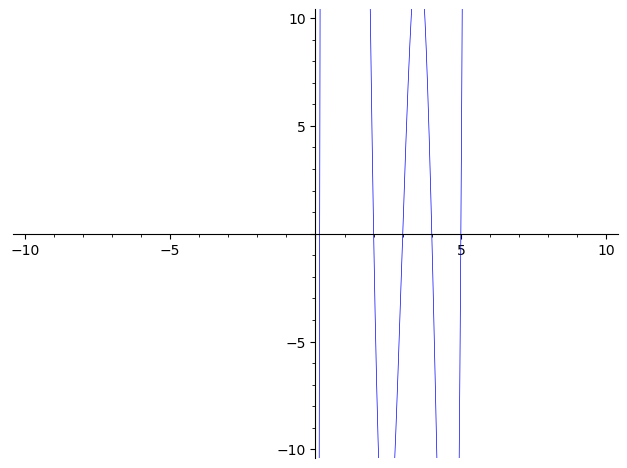

In [9]:
plot_P5 = plot(p, (x, -10, 10), ymin=-10, ymax=10, color='blue', thickness=0.5)
show(plot_P5)

Проверим решение через нахождение корней уравнения через функцию `roots`. `roots` имеет несколько настроек:
- `ring` - может быть `RR` (все действиетльные корни), `CC` (действительные + комплексные), если настройка не выставлена, то будут возвращены только точные корни
- `multiplicities` - если `True` (по умолчанию), то будут возвращен список пар (`root`, `m`), где `root` является корнем, а `m` его степенью; если `False`, то вернется обычный список корней

In [10]:
roots = p.roots(ring=RR, multiplicities=False)
print("Корни многочлена P5(x):")
for root in roots:
    print(root)

Корни многочлена P5(x):
0.142857142857143
2.00000000000000
3.00000000000000
4.00000000000000
5.00000000000000


## **Задание 5.** Разложите рациональную дробь на сумму простейших дробей.

In [11]:
eq = (4 * x^4 + 6 * x^3 + 5 * x - 4)/((x^2 + 3) * (x - 1)^2 * (x^2 - 4))
show(eq)

(4*x^4 + 6*x^3 + 5*x - 4)/((x^2 + 3)*(x^2 - 4)*(x - 1)^2)

Для разложения рациональной функции на сумму простейших дробей существует специальная функция `partial_fraction`

In [12]:
show(eq.partial_fraction())

-1/56*(45*x + 7)/(x^2 + 3) - 1/126/(x + 2) - 245/72/(x - 1) + 59/14/(x - 2) - 11/12/(x - 1)^2

## **Задание 6.** Решите графически уравнение и найдите его приближенные корни с точностью до $10^{-5}$

In [13]:
x = var('x')
f = ln(x - 2)^2 - 2 * sin(3 * x) + 0.5
show(f)

log(x - 2)^2 - 2*sin(3*x) + 0.500000000000000

Решим уравнение графически, найдем примерное положение точек, которые являются корнями уравнения

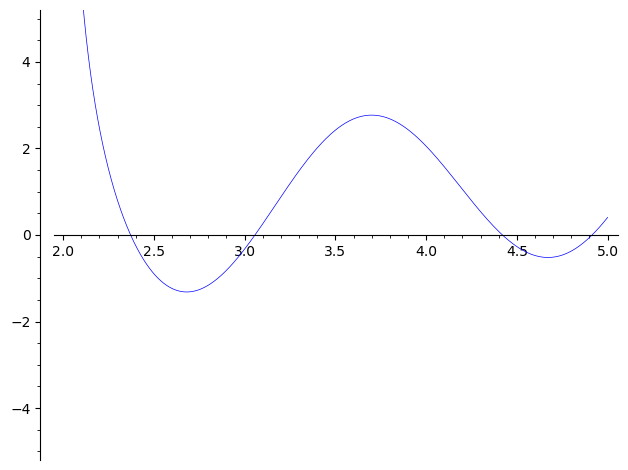

In [14]:
p = plot(f, (x, 2.01, 5), ymin=-5, ymax=5, color='blue', thickness=0.5)
show(p)

Так как `f` является не многочленом, а трансцендентной функцией (логарифм + синус), использовать `roots` здесь невозможно. Вместо этого используем `find_root` для поиска корней на некоторой области, в нашем случае это 4 области, где функция дала ноль. 

In [15]:
roots = [find_root(f, 2.3, 2.4), find_root(f, 3, 3.1), find_root(f, 4.4, 4.5), find_root(f, 4.8, 5)]

for root in roots:
    print(f"Корень: {round(root, 5)}")

Корень: 2.37181
Корень: 3.05684
Корень: 4.42061
Корень: 4.91432


Проверим полученные корни. Если все верно, то функция даст близкое к нулю значение.

In [16]:
check = [round(f(x=roots[0]), 5), round(f(x=roots[1]), 5), round(f(x=roots[2]), 5), round(f(x=roots[3]), 5)]
sum(check) == 0

True

## Задание 7. Докажите, что $\lim_{n\to\infty} a_{n}=a$, определив номер $n_{\epsilon}$, начиная с которого все члены последовательности попадут в $\epsilon$-окрестность точки $a$. Проиллюстрируйте полученный результат с помощью чертежа, положив $\epsilon=0,1$.

Введем ограничения для графика

In [17]:
y_min=1.2
y_max=1.6
x_min=1
x_max=30

Введем функцию

In [18]:
n = var('n')
an = (4 * n - 1)/(3 * n - 1)
a = 4/3
epsilon = 0.1

Определим номер $n_{\epsilon}$

In [19]:
epsilon_n_number = 0
while True:
    point = an(n=epsilon_n_number)
    if point < a + epsilon and point > a - epsilon:
        break
    epsilon_n_number += 1

if epsilon_n_number > x_max:
    x_max = epsilon_n_number + 1

print(f"Номер эпсилон n: {epsilon_n_number}")

Номер эпсилон n: 2


Построим график, который изображает числовую последовательность. Используем `list_plot` для создания графика из обычного `python` списка.

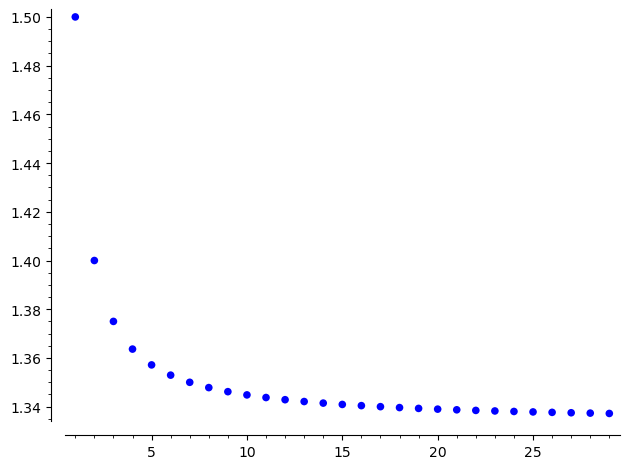

In [20]:
p = list_plot([(k, an(n=k)) for k in range(x_min, x_max)], color='blue', marker='o', size=30)
show(p)

Добавим линии для отображения $\epsilon$-окрестности и $n_{\epsilon}$ элемента. В `sagemath` это можно сделать с помощью специального графика `line`, которому для построения достаточно двух точек.

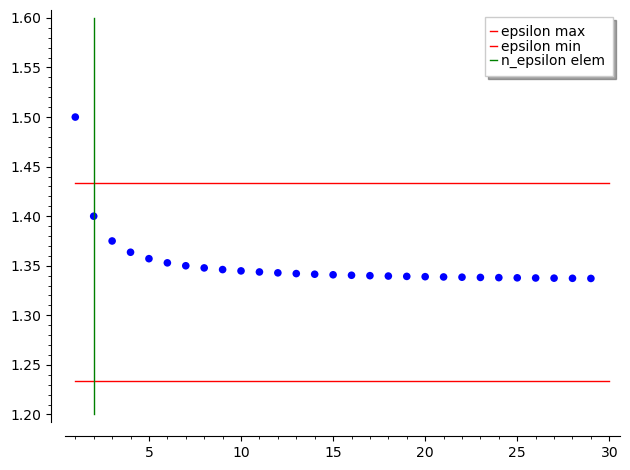

In [21]:
p += line([(x_min, a + epsilon), (x_max, a + epsilon)], color='red', legend_label='epsilon max', linestyle='-')
p += line([(x_min, a - epsilon), (x_max, a - epsilon)], color='red', legend_label='epsilon min', linestyle='-')
p += line([(epsilon_n_number, y_min), (epsilon_n_number, y_max)], color='green', legend_label='n_epsilon elem', linestyle='-')
show(p, ymin=y_min, ymax=y_max)

Как видно, попадание в $\epsilon$-окрестность точки происходит именно на втором элементе

## **Задание 8.** Вычислите пределы числовых последовательностей.

In [22]:
a_n = ((3 * n^2 - 6 * n + 7)/(3 * n^2 + 20 * n - 1))^(1-n)

Для вычисления предела числовой последовательности в `sagemath` используется функция `limit`, обозначить, что $n \rightarrow \infty$ можно через `n=oo`

In [23]:
lim = limit(a_n, n=oo)
show(lim)

e^(26/3)

## **Задание 9.** Для заданной кусочно-непрерывной функции выполните следующие действия.
1) Определите ее через функциональный оператор и постройте график.
2) В точке разрыва и на бесконечности найдите односторонние пределы.
3) Найдите производную и неопределенный интеграл на каждом из промежутков непрерывности.
4) Постройте в одной системе координат графики функции, производной и какой-нибудь первообразной.
5) Найдите площадь криволинейной трапеции, ограниченной графиком функциии прямыми $x=1$, $x=5$, $y=0$. Сделайте чертеж.

1) Определим кусочно-непрерывную функцию через `piecewise`

In [24]:
x = var('x')
left = (3 * cos(2 * x))
right = (5 * exp(-0.3 * x))
f = piecewise([((-infinity, -pi()), left), 
               ((-pi(), +infinity), right)])
show(f)

piecewise(x|-->3*cos(2*x) on (-oo, -pi), x|-->5*e^(-0.300000000000000*x) on (-pi, +oo); x)

Для построения кусочно-непрерывной функции достаточно будет стандартной функции `plot`

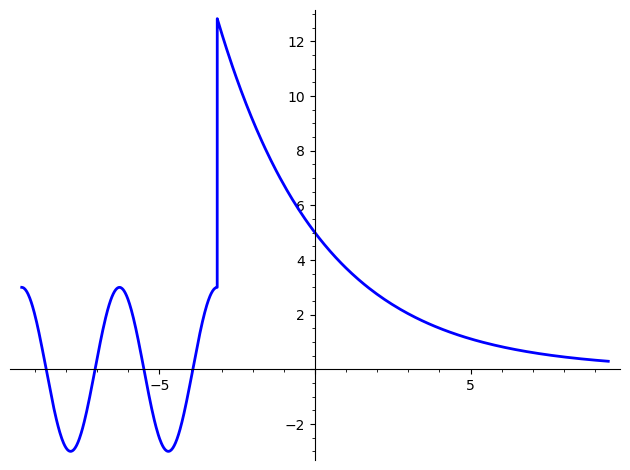

In [25]:
p = plot(f, (x, -pi()*3, pi()*3), color='blue', thickness=2)
show(p)

2) В точке разрыва и на бесконечности найдите односторонние пределы.

Точкой разрыва является $-\pi$

In [26]:
limit_left = limit(left, x=(-pi()), dir='-')
limit_right = limit(right, x=(-pi()), dir='+')

print("Предел слева в x=-π:")
show(limit_left)
print("Предел справа в x=-π:")
show(limit_right)

Предел слева в x=-π:


3

Предел справа в x=-π:


5*e^(3/10*pi)

Сделаем то же самое на $\infty$

In [27]:
limit_left = limit(left, x=(-infinity))
limit_right = limit(right, x=(infinity))

print("Предел при x → +∞:")
show(limit_right)
print("Предел при x → -∞:")
show(limit_left)

Предел при x → +∞:


0

Предел при x → -∞:


ind

3) Найдите производную и неопределенный интеграл на каждом из промежутков непрерывности.

Начнем с левого участка $3 \cdot cos2x$

In [28]:
df1 = diff(left, x)
F1 = integrate(left, x)

print("Производная на (-∞, -π):")
show(df1)
print("Первообразная на (-∞, -π):")
show(F1)

Производная на (-∞, -π):


-6*sin(2*x)

Первообразная на (-∞, -π):


3/2*sin(2*x)

Теперь второй участок $5 \cdot e^{-0.3x}$

In [29]:
df2 = diff(right, x)
F2 = integrate(right, x)

print("Производная на (-π, ∞):")
show(df2)
print("Первообразная на (-π, ∞):")
show(F2)

Производная на (-π, ∞):


-1.50000000000000*e^(-0.300000000000000*x)

Первообразная на (-π, ∞):


-16.666666666666668*e^(-0.3*x)

4) Постройте в одной системе координат графики функции, производной и какой-нибудь первообразной.

In [30]:
df = piecewise([((-infinity,-pi()), df1), ((-pi(),+infinity), df2)])
F = piecewise([((-infinity,-pi()), F1), ((-pi(),+infinity), F2)])

Построим графики

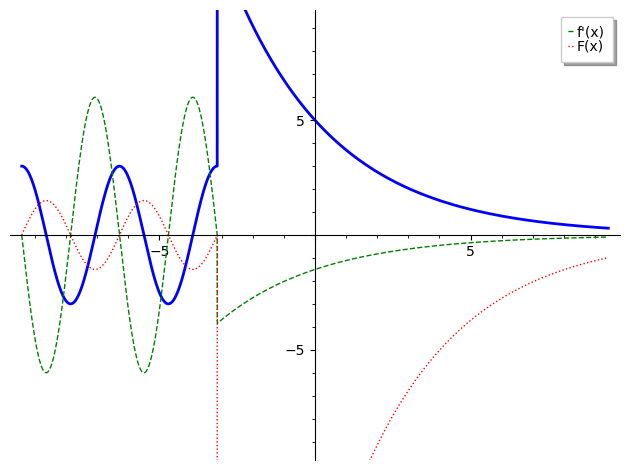

In [31]:
plot_df = plot(df, (x, -pi()*3, pi()*3), color='green', linestyle='--', legend_label="f'(x)")
plot_F = plot(F, (x, -pi()*3, pi()*3), color='red', linestyle=':', legend_label='F(x)')
show(p + plot_df + plot_F, ymin=-pi()*3, ymax=pi()*3, legend_loc='upper right')

5) Найдите площадь криволинейной трапеции, ограниченной графиком функциии прямыми $x=1$, $x=5$, $y=0$.

   В промежуток $[1, 5]$ попадает только правая часть кусочно-непрервной функции, следовательно, в данном случае для построения графика имеет смысл рассматривать только его. Однако для вычисления площади необходимо учитывать обе части.

In [32]:
area_left = integrate(left, (x, 1, -pi()))
area_right = integrate(right, (x, -pi(), 5))
total_area = area_left + area_right

print("Площадь криволинейной трапеции:")
show(total_area)

Площадь криволинейной трапеции:


16.666666666666668*cosh(0.3*pi) - 3/2*sin(2) + 16.666666666666668*sinh(0.3*pi) - 3.7188360024738305

Построим график

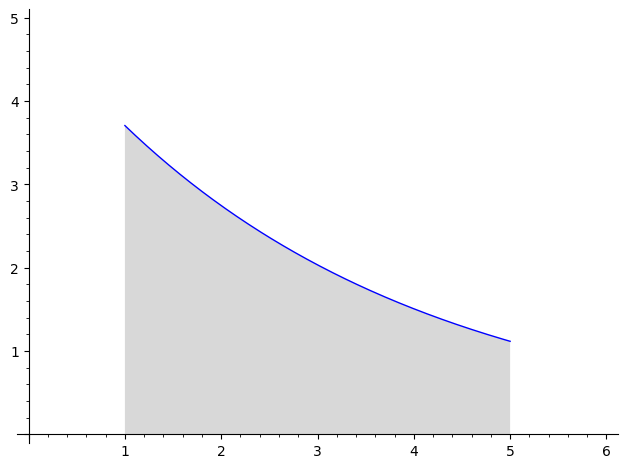

In [33]:
p = plot(right, (x, 1, 5), fill='axis', fillalpha=0.3)
show(p, ymin=0, ymax=5, xmin=0, xmax=6)

## **Задание 10.** Постройте кривые на плоскости. Для кривой второго порядка (пункт 2) найдите каноническое уравнение с помощью ортонормированного базиса из собственных векторов квадратичной формы.

1) Для добавления $e^{-0.6x}$ используется функция `exp`.

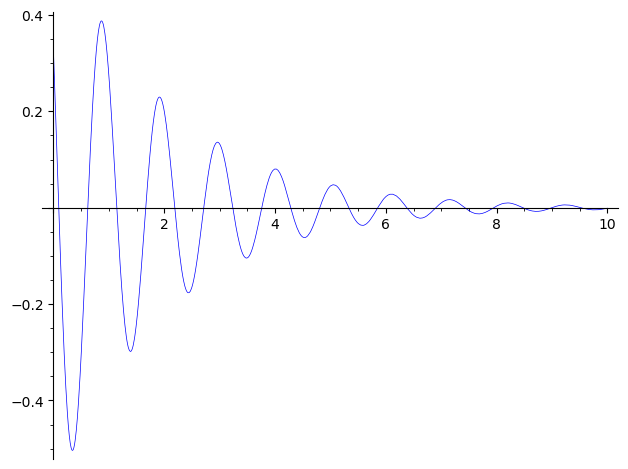

In [34]:
f = 0.6 * exp(-0.5 * x) * cos(6 * x + 1)
p = plot(f, (x, 0, 10), color='blue', thickness=0.5)
show(p)

2) Введем второе выражение, оно содержит две символьные переменные

In [35]:
x, y = var('x y')
f = 9 * x^2 + 12 * x * y + 4 * y ^ 2 - 24 * x - 16 * y + 7 

Для построения графика необходимо выразить `y`. Сделаем это с помощью функции `solve` с указанием переменной, относительно которой стоит решить уравнение.

In [36]:
sol = f.solve(y)
show(sol)

[y == -3/2*x + 1/2, y == -3/2*x + 7/2]

Было получено два корня (что неудивительно), построим два графика и объединим их. Для преобразования уравнений в многочлены возьмем их правые части с помощью `rhs`. 

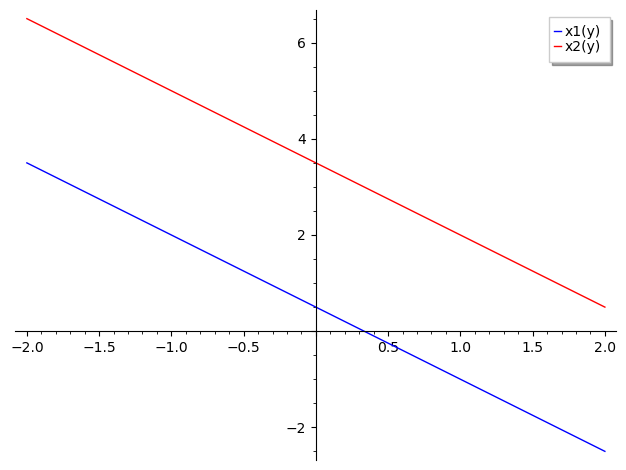

In [37]:
x1_y = sol[0].rhs()
x2_y = sol[1].rhs()

p = plot(x1_y, (x, -2, 2), color='blue', legend_label='x1(y)')
p += plot(x2_y, (x, -2, 2), color='red', legend_label='x2(y)')

show(p)

3) В данном пункте мы имеем дело с параметрически заданной кривой

In [38]:
t = var('t')

x_t = 3 * (t - sin(t))
y_t = 3 * (1 - cos(t))

Для построения такого рода графиков используется `parametric_plot`, она принимает две функции вместо одной

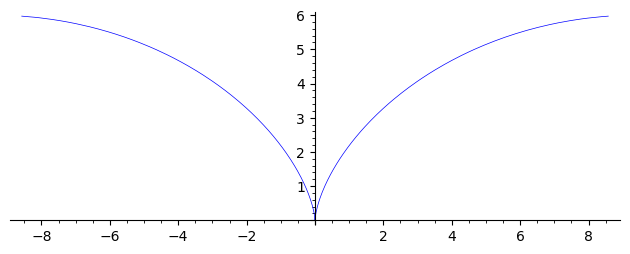

In [39]:
p = parametric_plot((x_t, y_t), (t, -3, 3), color='blue', thickness=0.5)
show(p)

4) Данный случай является работой с функцией в полярных координатах

In [40]:
phi = var('phi')
ro = 1 + 2 * cos(3 * phi - pi()/4)

Для построения функции в полярных координатах (координаты точки задаются через расстояние от точки до начала координат и угла между положительным направлением $Ox$ и лучом от начала координат до точки) используется функция `polar_plot`

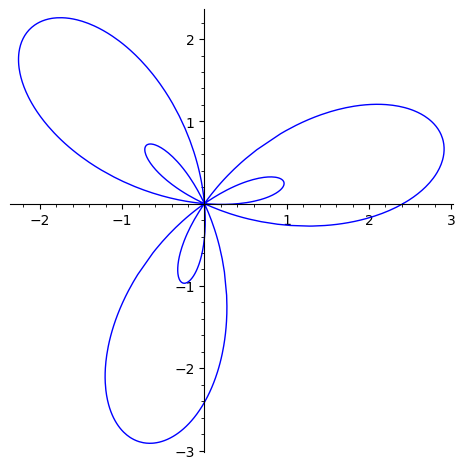

In [41]:
polar_plot(ro, (phi, 0, 2*pi))